# 회귀분석이란?

* 통계학에서 전통적으로 많이 사용되던 분석 방법<br>
관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 적합도 까지 측정!

- 실생활 적용 사례
    1. 부모의 키와 자식의 키 사이의 관계
    2. 자동차의 스펙을 이용한 가격 예측
    3. 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측

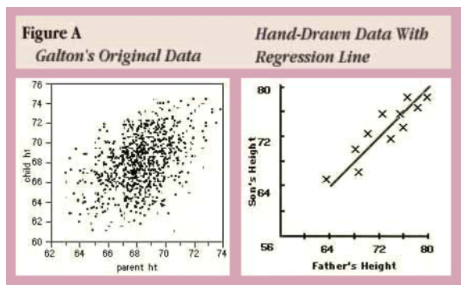

> 그림1<br>
영국의 우생학자 F.Galton이 회귀라는 개념을 제시했는데, 위 그림은 당시 아버지의 키와 자식의 키 사이의 관계에 대한 원본 데이터와, 이를 토대로 그려본 직선 형태의 함수 관계도이다.<br>
아버지의 키 $x$와 자식의 키 $y$ 사이의 직선 형태의 기울기가 1보다 작다는 것에 주목하였다.<br>
이것은, 세대를 거듭할수록 아버지의 키가 크든 작든 무관하게 키는 전체 평균에 수렴하게 된다는 것을 의미한다.

❗ 하지만, 오늘날은?
- 오늘날에는 평균으로 수렴하는 현상을 넘어서서, 두개 이상의 변수 사이의 함수 관계를 추구하는 통계적 방법을 의미한다.<br>
이것을 **선형회귀(Linear Regression)**라고 한다.

❓ 선형 회귀분석을 통해 좋은 모델을 어떻게 만들까
- 일단 아래 4가지 가정을 만족해야 한다.
    1. 선형성
    2. 독립성
    3. 등분산성
    4. 정규성

# 데이터별 회귀분석 사용 용도

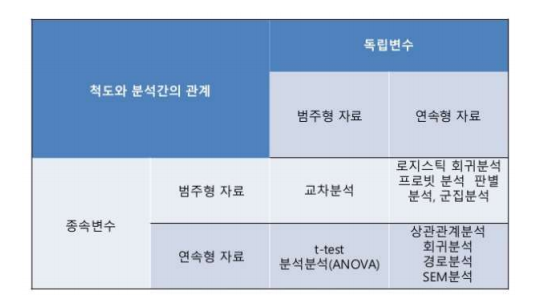

---

## 선형성❓
- 예측하고자 하는 종속변수 y와 독립변수 x간에 선형성을 만족하는 특성

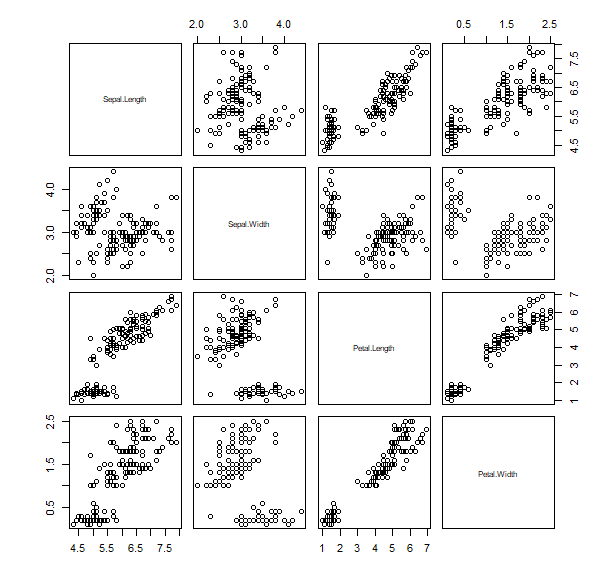

* 보통 변수선택법을 이용하여 선형성이 없는 변수를 rescale한다.

## 독립성❓
- 독립변수 x간 상관관계가 없이 독립성을 만족하는 특징! (다중회귀는 x변수가 2개 이상이다.)

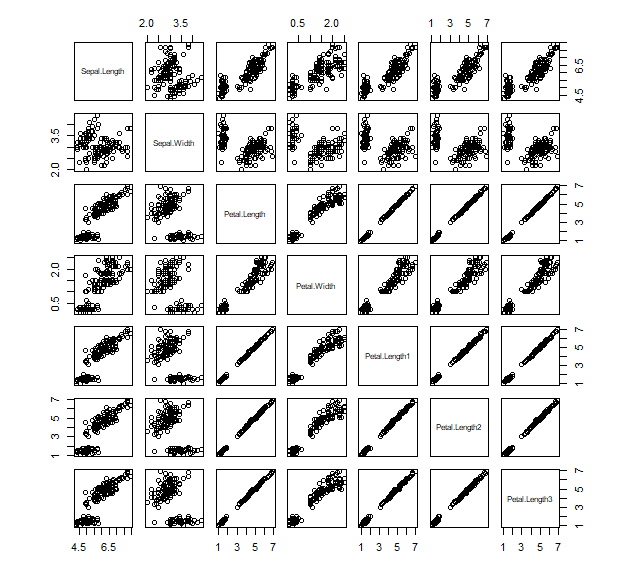

- 뭐야 거의 다 선형을 이루고 있네? 그럼 독립변수 중 누가 가장 종속변수에 영향을 미치지?<br>
를 모르게 된다.

##  등분산성❓
- 분산이 같다는 뜻, 특정한 패턴 없이 고르게 분포했다는 의미이다.

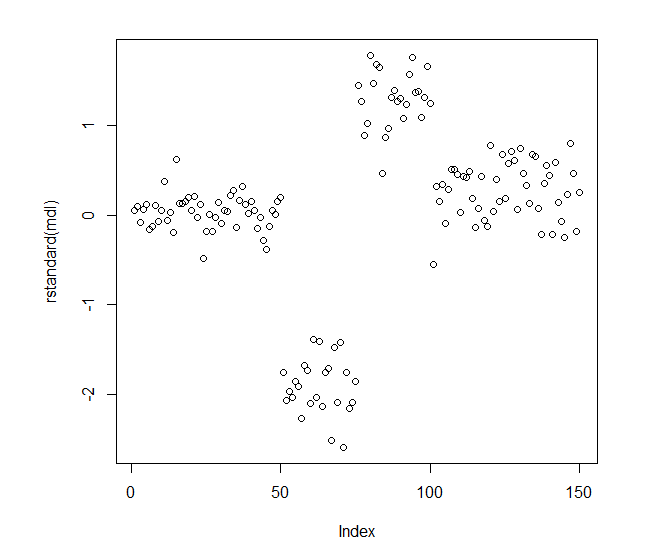

> 그림2<br>
표준화를 한 잔차들의 모습인데, 서로간의 분산(떨어져 있는 거리)가 일정하지가 않다.<br>
이 말은, 4개의 덩어리가 있는 특정 패턴을 가지고 있다. 패턴이 일정하지 않으니 선형관계를 성립할 수 없다.

## 정규성❓
- 잔차가 정규성을 만족하는지 여부, 정규분포를 띄는지 여부를 의미한다.

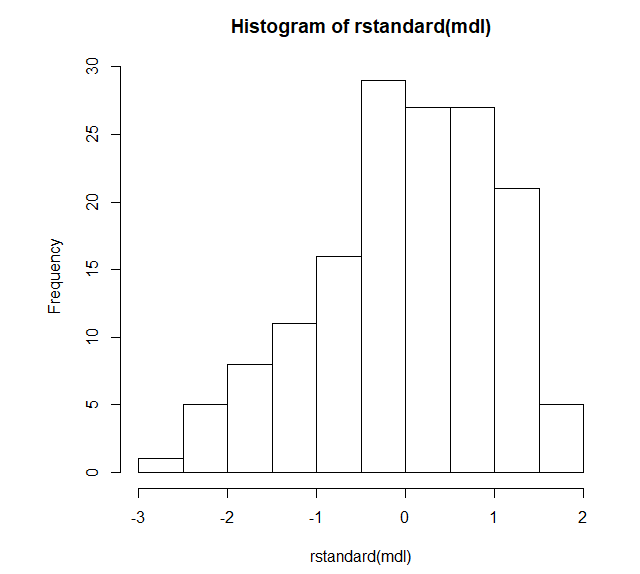

> 그림3 <br>
표준화 잔차의 히스토그램, 눈으로만 봐도 정규분포를 띄고 있지 않다.<br>
블로그에서 수치화를 시킨 값만 봐도 귀무가설(정규분포와 차이가 없다)를 기각하므로, 위 데이터는 정규분포와 차이가 있고, 정규성을 만족하지 않는다라는 결론이 된다.

[참고 자료](https://kkokkilkon.tistory.com/175)

---

## 선형 회귀 식은 어떻게 나타낼까❓

$$ y = \beta x + \epsilon$$
* $\beta$는 회귀계수, $\epsilon$은 오차를 의미

- 결국 주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것이다.

머신러닝에서는 다음과 같이 나타낸다
$$ H = Wx + b$$

## 오차는 뭐고 잔차는 뭐야❗

오차 = 모집단의 회귀식에서 예측된 값 - 실제 관측 값

잔차 = 표본집단의 회귀식에서 예측된 값 - 실제 관측 값

## 보스턴 데이터에 적용해보기

In [ ]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03
1,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79
2,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45
3,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44
4,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


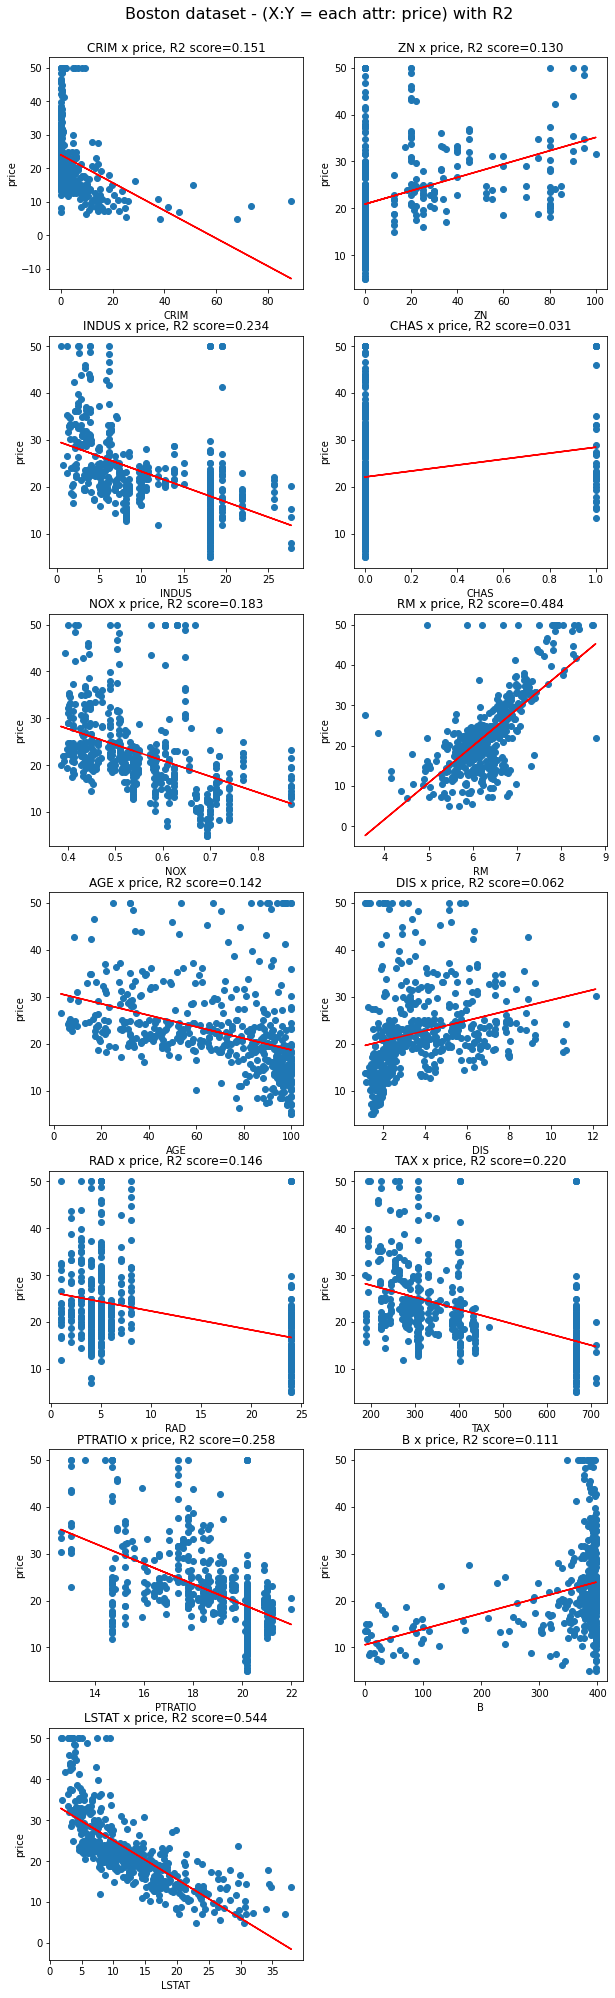

In [ ]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

## 경사하강법

- 적절한 회귀모델의 회귀계수를 찾기 위해서는 결국 손실함수를 잘 설정하는 것이 중요하다.

- 손실함수를 최소화하는 $W$와 $b$를 구하는 것이 결국 핵심이다.

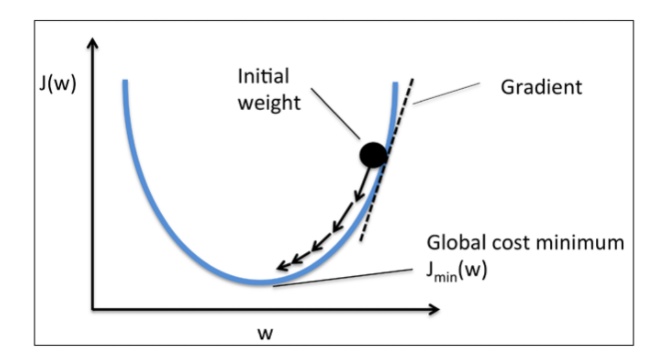

$$y = \beta x + \epsilon$$<br> $$H = Wx + b$$<br>
- 닮은 구석이 있는 것 같은데..

$$ W := W - \alpha\frac{\sigma}{\sigma W}J(W)$$

---

# 로지스틱 회귀분석

- 데이터가 어떤 범주에 속할 확률을 0 ~ 1 사이의 값으로 예측하고<br> 그 확률에 따라 가능성이 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

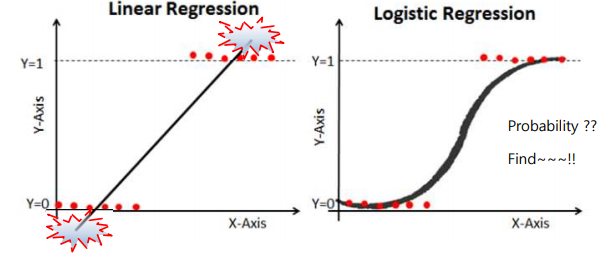

> 그림1<br>
만약 데이터가 범주형 자료이고, 저런 형태면 선형회귀, 로지스틱회귀 중 어떤 것이 유리할까?<br>
당연히 **로지스틱회귀분석**

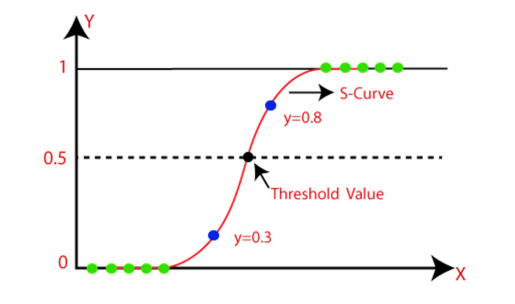

> 그림2<br>
Y = 1일 확률을 구하고 그 확률을 기준으로 나누자.

---

오즈를 구하면 Y=1 일때의 확률을 구해낼 수 있다.

* 식으로 나타낸다면..
$$ LogOdds = log(\frac{P(y=0|x)}{1-P(y=0|x)}) = \beta_{0} + \sum_{j=1}^{p}\beta_jx_j$$<br>

결국 이러한 Odds라는 개념은 발생할 확률을 발생하지 않을 확률로 나타낸 것이다.<br>
위 식에 log를 취하면 Log-Odds가 되는데, 식은 다음과 같다.<br>

$$log(\frac{P(Y=0|x}{1-P(Y=0|x}) = log(0.25) = \beta_0 + \sum_{j=1}^{p}\beta_jx_j$$<br>
그런데 우리가 원하는 값은 log-odds가 아니다. **종속변수가 0에 속하는가, 1에 속하는가**를 알고 싶다.<br><br>
$$P(Y=0|X)에 대해서 정리$$<br>
$$P(y=0|x) = \frac{exp(\beta_0+\sum_{j=1}^{p}\beta_j x_j)}{1+exp(\beta0+\sum_{j=1}^{p}\beta_j x_j)} $$

$$ z = exp(\beta_0 + \sum_{j=1}^{p}\beta_j x_j)라고 한다면$$

$$ P(y = 0|x) = \frac{1}{1+exp(-z)}$$

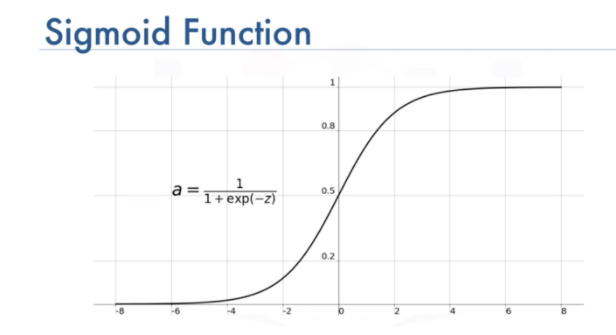

---

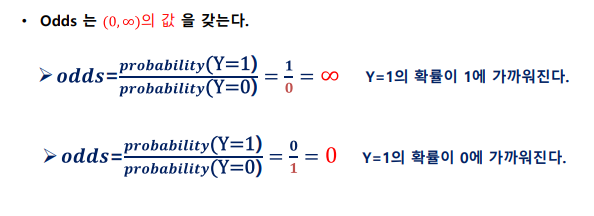

---

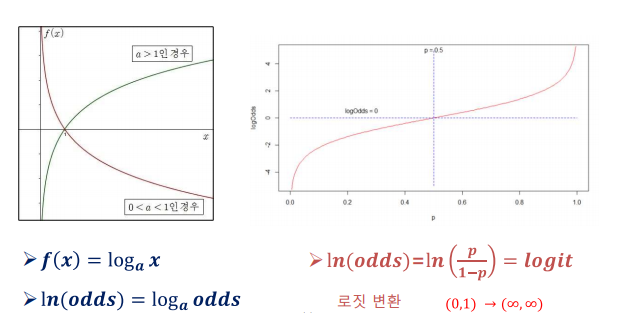

---

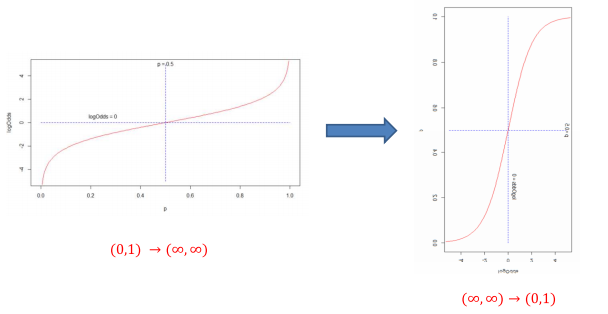

---

# 다중 로지스틱 회귀 (Softmax)

* 3개의 영역을 잘 구분할 수 있는 직선 학습
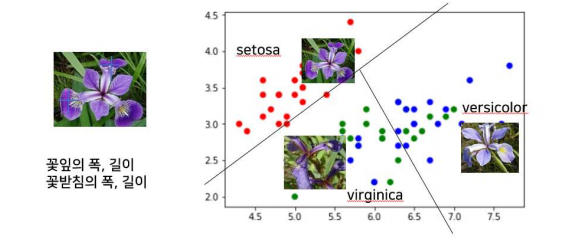

---

* 3개의 클래스를 분류하기 위해서는 3개의 분류기를 사용해야 하지 않을까?

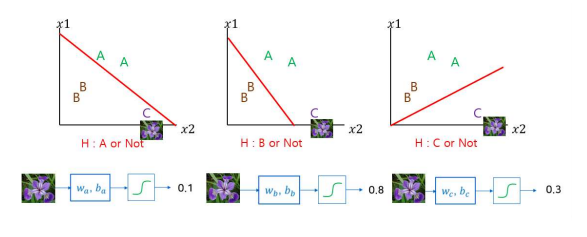

여기서 확률을 합치게 되면 확률의 합이 1이 넘는다.

따라서 정규화가 필요하고 그 과정은 다음과 같다.

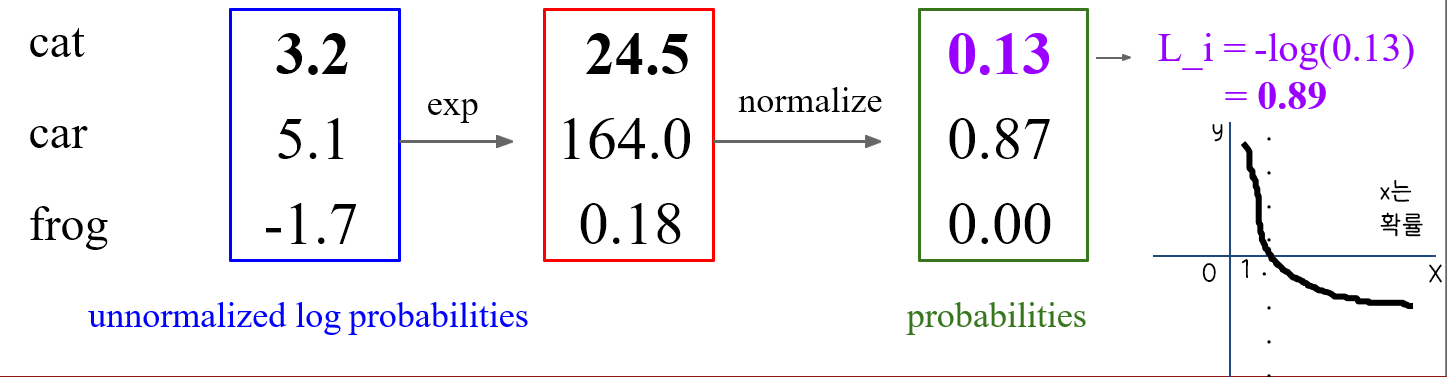

# Cross Entropy

* softmax 함수의 손실함수로 쓰이는 cross entropy<br>
$$H(p, q) = -\sum_{x}{p(x)\,log\,q(x)}$$

* 선형 회귀에서는 손실함수가 잔차의 제곱합이였다.<br>잔차의 제곱은 L2 distance와 다소 다르지만 회귀 모델의 추정치와 실제 값의 종속변수 좌표축 방향으로 차이, 즉 거리를 측정하기에 적절한 형태를 띄고 있다.

* 그런데 로지스틱에서는 종속변수 방향이 바로 확률변수 방향이다.<br>
잔차의 제곱 형태로 확률을 측정할 수 가 없다.<br>
확률 0.4와 0.6의 거리와 0.8과 1.0 사이의 거리가 과연 같을까?

# 오차에 대해서

1. 시그모이드 함수의 특징은 $y$값이 0과 1사이이다.
2. 실제 값이 1일 때 예측 값이 0에 가까워지면 오차가 커진다.
3. 반대로, 실제 값이 0일 때 예측 값이 1에 가까워지는 경우에도 오차는 커진다.
4. 이를 공식으로 만들 수 있게 해주는 함수가 바로 로그 함수.<br>
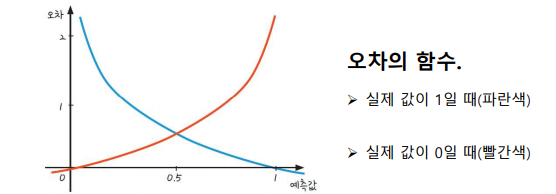